In [246]:
import array
import os
import numpy as np
import random
from PIL import Image

class PPM2grey:
    def __init__(self):

        
        
        self.dximg=None
        self.dyimg=None        
        
        
    def pgm_read(self,file):
            #Importing ppm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 2-D array using numpy module with float values
            real_image_arr=np.asarray(real_image,dtype=np.float16)
            real_arr=real_image_arr.copy()

            
            #getting the height and width of the ppm image
            shape = real_image_arr.shape
            self.height = shape[0]
            self.width =  shape[1]
            
            return real_arr


    def pgm_conv(self,image_array, Gradient):
        if Gradient=='x':
                    x_sobel=[-1,0,1]
                    y_sobel=[1,2,1]
                    
        elif Gradient=='y':
                    x_sobel=[1,2,1]
                    y_sobel=[-1,0,1]
        else:
            return


            
            
        if self.width and self.height:
            
            #creating a copy of the 3-D array of the ppm image
            X_buffer = image_array.copy()
            
            
            #creating a 1-D array for the pgm image
            Y_buffer = image_array.copy()
            
            
            
           # x_sobel=[1,2,1]
            for i in range(1,self.height-1):
                    Left=0
                    up=0
                    Right=0
                    
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        Left= (image_array[i][j-1] * x_sobel[0])
                        current= (image_array[i][j] * x_sobel[1])
                        Right= (image_array[i][j+1] * x_sobel[2])
                        
                        val= (Left + current + Right)
                        
                        Y_buffer[i][j]= val
                        
                        
                        
                        
            #---------------------for pgm 1-D array-----------------------------------
                        
                    
                    
                        
          #  y_sobel=[-1,0,1]

            for i in range(1,self.height-1):
                    up= 0
                    current= 0
                    down= 0
                    for j in range(1,self.width-1):
                        
                        #---------------------for X 3-D array---------------------------------
                        up= (Y_buffer[i-1][j] * y_sobel[0])
                        current= (Y_buffer[i][j] * y_sobel[1])
                        down= (Y_buffer[i+1][j] * y_sobel[2])
                        
                        val= up +current+ down

                        X_buffer[i][j]= val
                        
                        
                        

            #-------------------------------------------------------
            if Gradient=='x':
                
                self.dximg = X_buffer.astype(np.int8)
            elif Gradient=='y':
                
                self.dyimg= X_buffer.astype(np.int8)

            return X_buffer


 
    def pgm_normalize(self, image_array):
            old_max=image_array.max()
            old_min=image_array.min()
            old_range=old_max - old_min
            print(image_array.max())
            print(image_array.min())
            new_min=0.0
            new_max=255.0
            new_range=new_max - new_min

            for i in range(1,self.height-1):
                    for j in range(1,self.width-1):
                            old_val= image_array[i][j]
                            scale=(old_val-old_min)/old_range
                            
                            new_val=(new_range*scale)+new_min
                            image_array[i][j]= int(new_val)
                            
            image_array = image_array.astype(np.int8)
            return image_array

    
            
    def pgm_write(self ,image_array, file_name):            
            
            #creating an output file for pgm greyscale image
            pgm_grey = file_name
            
            
            #opening the output file
            fout_pgm=open(pgm_grey,'wb')

            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())


            image_array.tofile(fout_pgm)
            
            fout_pgm.close()
    

    def pgm_free(self):
        if self.pgm_ready:
            os.remove('Grey_luminosity.pgm')
            os.remove('Grey_luminosity.pgm')

            self.pgm_ready=False
            self.pgm_buff=None
        
        else:
            print('files does not exist!')
            
if __name__=='__main__':
    file='model.pgm'
    new_obj=PPM2grey()
    
    #allocate image of given size
    gimg = new_obj.pgm_read(file)
    
    # convolve
    ndximg= new_obj.pgm_conv(gimg, 'x')
    ndyimg= new_obj.pgm_conv(gimg, 'y')
    
    #copy edge image and normalize, for visualization purposes
    
    ndximg=new_obj.pgm_normalize(ndximg)
    new_obj.pgm_write(ndximg,'ndxgrey.pgm')

    
    ndyimg=new_obj.pgm_normalize(ndyimg)
    new_obj.pgm_write(ndyimg,'ndygrey.pgm')
    
    
    #output to file
    new_obj.pgm_write(new_obj.dximg, "dxgrey.pgm")
    new_obj.pgm_write(new_obj.dyimg, "dygrey.pgm")

    

        

699.0
-647.0
840.0
-720.0


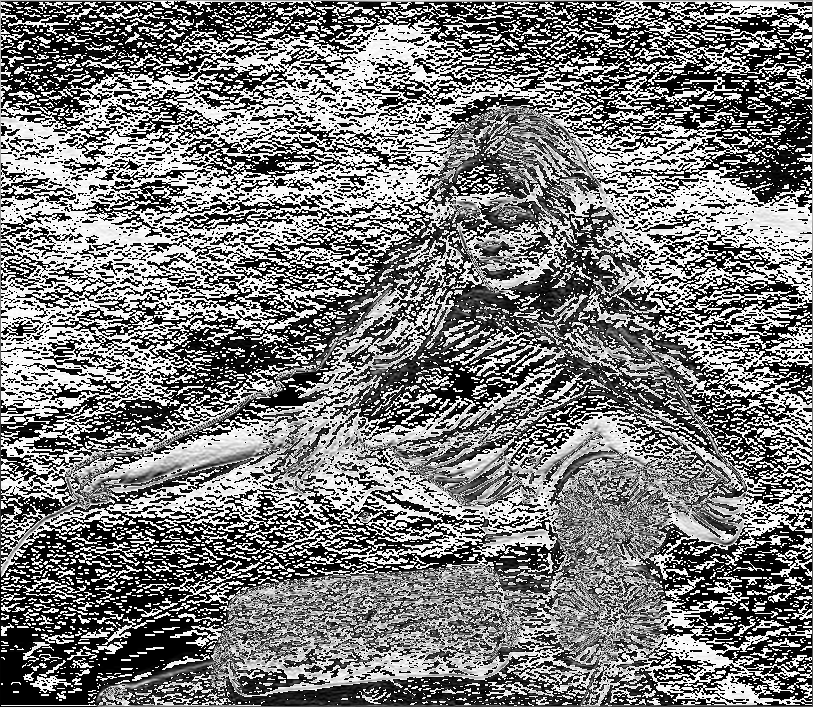

In [247]:
Image.open('dygrey.pgm')

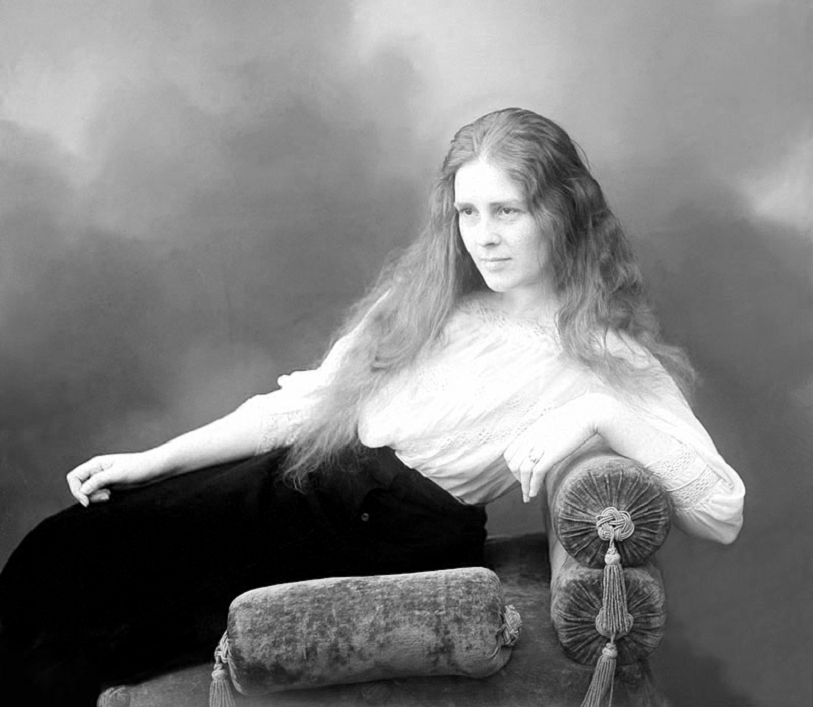

In [251]:
Image.open('model.pgm')

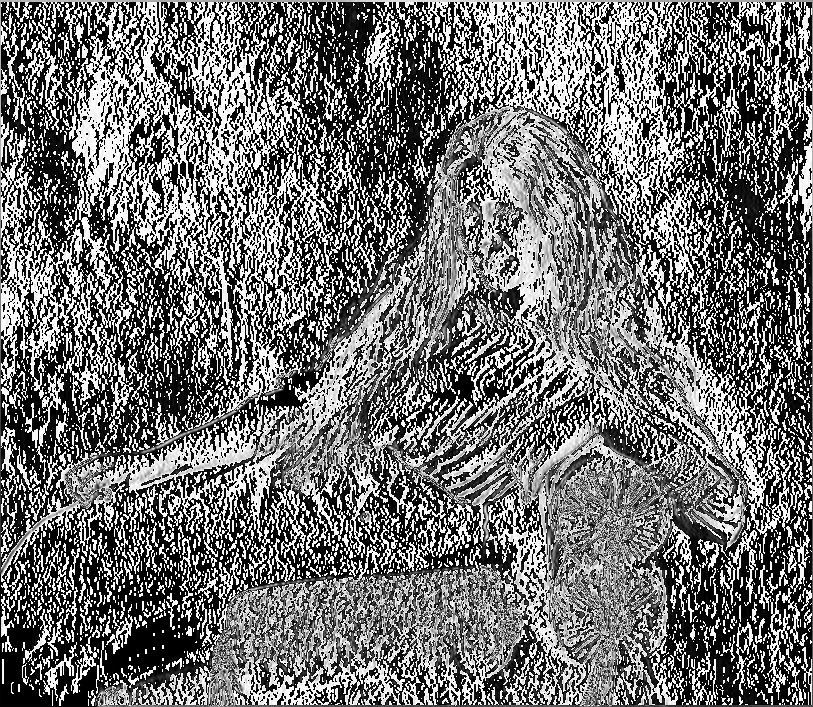

In [248]:
Image.open('dxgrey.pgm')

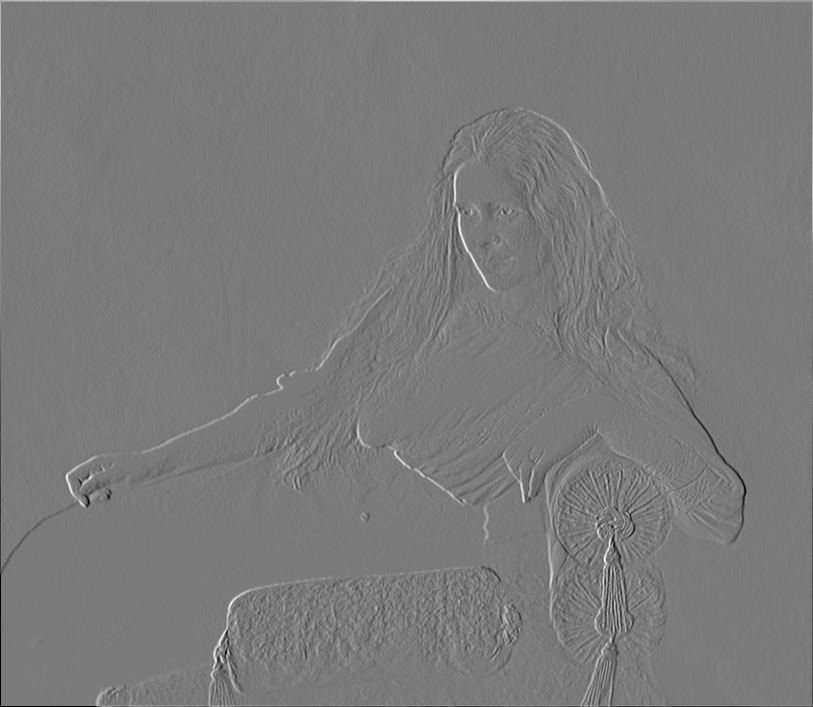

In [249]:
Image.open('ndxgrey.pgm')

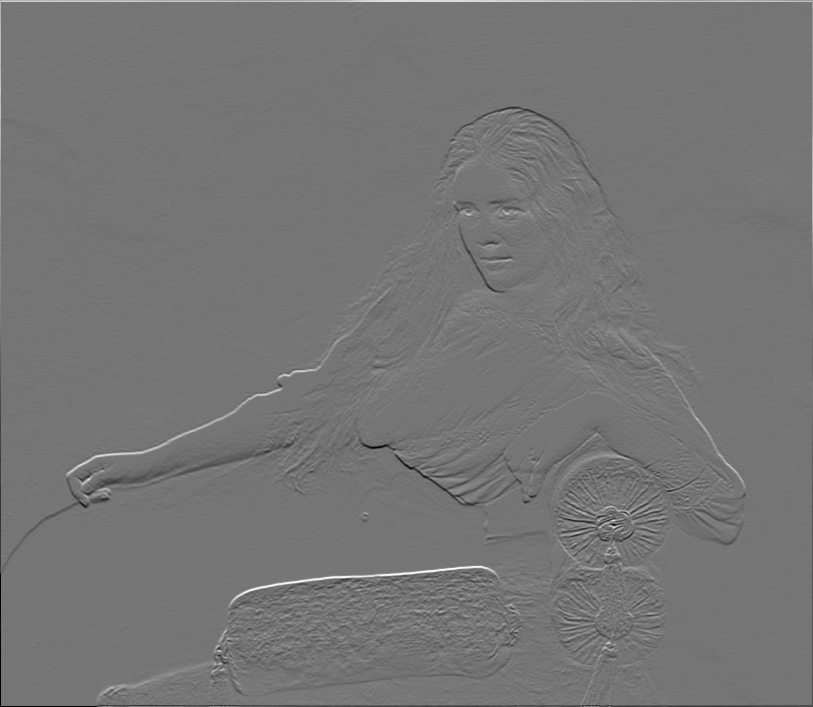

In [245]:
Image.open('ndygrey.pgm')